Train score:
0.7725460559817883
Test score:
0.8050371975357663


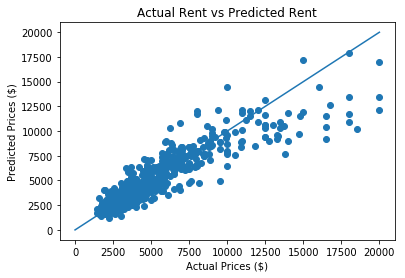

Model Coefficients:  [[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
  -140.90664773   -7.58272473   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]


In [9]:
# In this project we use apartment features to predict the price of rental units in NYC

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

# for simplicity I omit neighborhood and borough data, because they are strings, 
# eg 'Greenwich Village', 'Bronx', and so they have to be encoded via the scikit-learn 
# OneHotEncoder function 

# define the labels
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
        'no_fee',  'building_age_yrs', 'has_roofdeck', 'has_washer_dryer',
        'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
        'has_gym']]

# define the data
y = df[['rent']]

# perform the train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

# initialize the linear regression model and fit it to our training data
lm = LinearRegression()
model = lm.fit(x_train, y_train)

# use the model to predict pricing on test data
y_predict= lm.predict(x_test)


# score the training and test models
print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

# plot the relationship between actual and predicted prices
# we should expect approximately a 1:1 relationship for an accurate model
plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

# the predictions are good until we reach the $10,000 price point,
# where a sort of logarithm is exhibited as our model increasingly 
# overestimates the rental price


# print the model coefficients to show which features have the most impact on the model
model_coefficients = model.coef_

print("Model Coefficients: ", model_coefficients)